# A class for module illumination
Klaus Jäger, 2 October 2019

This code generates the figures used for publication.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import rc
from matplotlib.patches import Rectangle
import pysolar.solar as sol
import datetime
import timeit
from bifacial_illumination import ModuleIllumination
%matplotlib inline

### Preamble

### Class definition

### Test the class

In [2]:
# Define the dictionary for the class
inputs = {
    'module_length': 1.960,# module length, standard is 1650 mm or 1960 mm
    'module_tilt': 52., # Angle of the module with respect to the ground (first guess optimal theta_m = latitude on Earth)
    'module_spacing': 7.3, # distance between modules
    'mount_height': 0.500, # height of module base above ground
    'dni': 1, # direct normal irradiance
    'dhi': 1, # diffuse horizontal irradiance
    'zenith_sun': 90-32.8, # zenith of the Sun (Berlin, 2019-09-20, 11:00 CEST)
    'azimuth_sun': 143.3, # azimuth of the Sun (Berlin, 2019-09-20, 11:00 CEST)
    'albedo': 0.3, # albedo of the ground
    'ground_steps': 101, #number of steps into which irradiance on the ground is evaluated in the interval [0,D]
    'module_steps': 12, # SET THIS NUMBER HIGHER FOR REAL EVALUATION! (SUGGESTION 20) number of lengths steps at which irradiance is evaluated on the module
    'angle_steps': 180 # Number at which angle discretization of ground light on module should be set
}

In [3]:
GI = ModuleIllumination(**inputs)

In [4]:
hour_range = np.linspace(4,21,18,dtype = int)
minute_range = np.linspace(0,50,6,dtype = int)
time_array = np.zeros(len(hour_range)*len(minute_range))
ground_direct = np.zeros([3, len(hour_range)*len(minute_range), inputs['ground_steps']])
month_array = [6, 8, 11]

zenith_arr = []
azimuth_arr = []

for k,month in enumerate(month_array):
    for i,hh in enumerate(hour_range):
        #print(hh,'o clock')
        for j,mm in enumerate(minute_range):
            time_array[6*i+j] = hh + mm/60
            date_temp = datetime.datetime(2019, month, 20, hh, mm, 0, 0, tzinfo = datetime.timezone(datetime.timedelta(hours=2)) )
            zenith_arr.append(90 - sol.get_altitude(52.5, 13.25, date_temp))
            azimuth_arr.append(sol.get_azimuth(52.5, 13.25, date_temp))
           
zenith_arr = np.array(zenith_arr)
azimuth_arr = np.array(azimuth_arr)
inputs.update({'zenith_sun':zenith_arr, 'azimuth_sun':azimuth_arr})

GI = ModuleIllumination(**inputs)

#calculating irrdiance from radiance
ground_direct = (GI.results['radiance_ground_direct_emitted'] * np.pi / GI.albedo).reshape(3,108,-1)

/home/peter/anaconda3/envs/ds/lib/python3.7/site-packages/pysolar/solartime.py:112: UserWarning: I don't know about leap seconds after 2018
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)
/home/peter/workspace/bifacial_illumination/bifacial_illumination/geo.py:70: UserWarning: Zenith angle larger then 90 deg was passed to simulation. Zenith angle is truncted to 90.
  warnings.warn('Zenith angle larger then 90 deg was passed to simulation. Zenith angle is truncted to 90.')


## Figures for OpEx

In [5]:
plt.rcParams['font.size'] = 8.0
plt.rcParams['text.latex.preamble'] = r'\usepackage{arev}'
rc('text', usetex=True)

In [6]:
y_ticks = np.linspace(0,96,9,dtype=int)
x_ticks = [0,28,55,82]

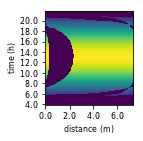

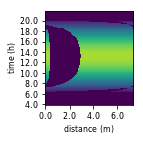

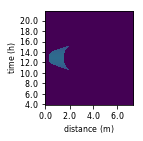

In [7]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(2,2))
    im = ax.imshow(ground_direct[i],origin='lower',vmax=0.88)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(np.round(GI.x_g_array[x_ticks],1))
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(time_array[y_ticks])
    ax.set_xlabel('distance (m)')
    ax.set_ylabel('time (h)')
    figname = 'figures/ground_illum_{}.pdf'.format(i)
    plt.tight_layout()
    #plt.savefig(figname, format='pdf', dpi=300)
    plt.show()

### Other figures for publications (OpEx)
Figures made on 20191111 and 20191112.

In [8]:
colors = ['#1f77b4','#ff7f0e','#396686','#c28249']
LightGrey = '#AAAAAA'
LightestGrey = '#EEEEEE'
DarkBlue = '#2D2F92'
plt.rcParams['font.size'] = 8.0
plt.rcParams['text.latex.preamble'] = r'\usepackage{arev}'
rc('text', usetex=True)

In [9]:
dt_1152 = datetime.datetime(2019, 6, 20, 11, 52, 0, 0, tzinfo = datetime.timezone(datetime.timedelta(hours=2)))
dt_1238 = datetime.datetime(2019, 6, 20, 12, 38, 0, tzinfo = datetime.timezone(datetime.timedelta(hours=2)))
inputs.update({
    'dni': 0, # direct normal irradiance
    'dhi': 440, # diffuse horizontal irradiance
    'zenith_sun': 90-sol.get_altitude(52.5, 13.25, dt_1152), # zenith of the Sun (Berlin, 2019-09-20, 11:00 CEST)
    'azimuth_sun': sol.get_azimuth(52.5, 13.25, dt_1152), # azimuth of the Sun (Berlin, 2019-09-20, 11:00 CEST)
})
GI_1152 = ModuleIllumination(**inputs)
inputs.update({
    'dni': 883, # direct normal irradiance
    'dhi': 134, # diffuse horizontal irradiance
    'zenith_sun': 90-sol.get_altitude(52.5, 13.25, dt_1238), # zenith of the Sun (Berlin, 2019-09-20, 16:00 CEST)
    'azimuth_sun': sol.get_azimuth(52.5, 13.25, dt_1238), # azimuth of the Sun (Berlin, 2019-09-20, 16:00 CEST)
})
GI_1238 = ModuleIllumination(**inputs)

In [10]:
irr_f = np.zeros([2,len(GI_1152.l_array)])
irr_b = np.zeros([2,len(GI_1152.l_array)])
for i,sg in enumerate(['sky','ground']):
    for k,dd in enumerate(['diffuse','direct']):
        irr_f[0] += GI_1152.results['irradiance_module_front_'+sg+'_'+dd]
        irr_b[0] += GI_1152.results['irradiance_module_back_'+sg+'_'+dd]
        irr_f[1] += GI_1238.results['irradiance_module_front_'+sg+'_'+dd]
        irr_b[1] += GI_1238.results['irradiance_module_back_'+sg+'_'+dd]
irr_t = irr_f + irr_b

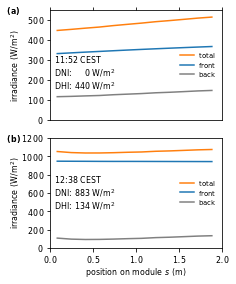

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(3.375, 4))
for i in range(2):
    if i == 0:
        ax = ax1
        subfig = r'\textbf{(a)}'
    else:
        ax = ax2
        subfig = r'\textbf{(b)}'
    ax.plot(GI_1152.l_array,irr_t[i],'-',label='total',color = colors[1])
    ax.plot(GI_1152.l_array,irr_f[i],'-',label='front',color = colors[0]) #, mfc = insidecolor)
    ax.plot(GI_1152.l_array,irr_b[i],'-',label='back',color = 'grey')
    ax.legend(frameon=False,fontsize=7)
    if i == 0:
        ymax = 550
        ax.set_ylim(0,ymax)
        ax.text(-.5,.97*ymax,r'\textbf{(a)}')
        ax.text(.05,.53*ymax,'11:52 CEST')
        ax.text(.05,.41*ymax,'DNI: \phantom{00}0 W/m$^2$')
        ax.text(.05,.29*ymax,'DHI: 440 W/m$^2$')
        ax.xaxis.tick_top()
        ax.set_xticklabels([])
    else:
        ymax = 1200
        ax.set_ylim(0,ymax)
        ax.text(-.5,.97*ymax,r'\textbf{(b)}')
        ax.text(.05,.6*ymax,'12:38 CEST')
        ax.text(.05,.48*ymax,'DNI: 883 W/m$^2$')
        ax.text(.05,.36*ymax,'DHI: 134 W/m$^2$')
        ax.set_xlabel('position on module $s$ (m)')

   
    ax.set_ylabel('irradiance (W/m$^2$)')
    
    ax.set_xlim(0,2)
fig.align_ylabels()
plt.tight_layout()
plt.show()

### Other figures

In [12]:
date = datetime.datetime(2019, 6, 20, 11, 52, 0, 0, tzinfo = datetime.timezone(datetime.timedelta(hours=2)) )
# Define the dictionary for the class
inputs.update({
    'dni': 1, # direct normal irradiance
    'dhi': 1, # diffuse horizontal irradiance
    'zenith_sun': 90-sol.get_altitude(52.5, 13.25, date), # zenith of the Sun (Berlin, 2019-09-20, 11:00 CEST)
    'azimuth_sun': sol.get_azimuth(52.5, 13.25, date), # azimuth of the Sun (Berlin, 2019-09-20, 11:00 CEST)
})
GI = ModuleIllumination(**inputs)

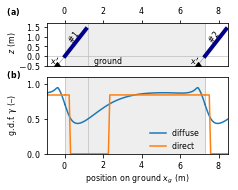

In [13]:
# PARAMETERS OF THE MODULE LINE
d = inputs['module_spacing']
l = inputs['module_length']
h = inputs['mount_height']
theta_m = inputs['module_tilt']
k_m = np.tan(theta_m*np.pi/180.)
d_m = 0.0



mod_func = k_m*GI.x_g_array
h_mod = l*np.sin(theta_m*np.pi/180.)
w_mod = l*np.cos(theta_m*np.pi/180.)

id_mod = np.where(mod_func <= h_mod)
id_mod = id_mod[0][:-1] # remove last element


x_mod_array = GI.x_g_array[id_mod]
y_mod_array = mod_func[id_mod]
  
irr_ground_diff = GI.results['radiance_ground_diffuse_emitted'] * np.pi/GI.albedo
irr_ground_dir = GI.results['radiance_ground_direct_emitted'] * np.pi/GI.albedo

x_shadow = -h/np.tan(theta_m*np.pi/180.)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.375, 2.7))

# AXIS 1
ax1.add_patch(Rectangle((0, -h), d, h+h_mod+.2, color = LightestGrey))
ax1.axhline(0,color = LightGrey,linewidth = 0.5) 
for i,x_off in enumerate([0,d]): #x_off ... x offset
    ax1.axvline(x_off,color = LightGrey,linewidth = 0.5) 
    ax1.axvline(w_mod+x_off,color = LightGrey,linewidth = 0.5)    
    ax1.plot(np.array([x_shadow,0])+x_off,[-h,0],linewidth = 0.5, color='Grey')
    ax1.plot(x_mod_array+x_off,y_mod_array,linewidth = 4, color='DarkBlue')
    ax1.plot(x_shadow+x_off,-h,'d',color='k')
    ax1.text(0.07+x_off,1.0,'\#{}'.format(i+1),rotation = theta_m)
    ax1.text(x_shadow+x_off,-h+0.1,'$x\'$',horizontalalignment='right')

ax1.text(-3,2.2,r'\textbf{(a)}')
ax1.text(w_mod+.3,-h+.1,'ground')
ax1.xaxis.tick_top()
ax1.set_ylabel('$z$ (m)')
ax1.set_xlim(-0.95,8.5)
ax1.set_ylim(-.5,h_mod+.2)
ax1.set_yticks(np.linspace(-.5,1.5,5))
ax1.set_aspect('equal')

# AXIS 2
ax2.add_patch(Rectangle((0, 0), d, 1.1, color = LightestGrey))
for i,x_off in enumerate([-d,0,d]):
    ax2.axvline(d+x_off,color = LightGrey,linewidth = 0.5)
    ax2.axvline(w_mod+x_off,color = LightGrey,linewidth = 0.5)
    ax2.plot(GI.x_g_array+x_off,irr_ground_diff,'-',color = colors[0],label=['','diffuse',''][i])
    ax2.plot(GI.x_g_array+x_off,irr_ground_dir,'-',color = colors[1],label=['','direct',''][i])

ax2.set_xlabel('position on ground $x_g$ (m)')
ax2.set_ylabel('g.d.f.\ $\gamma$ (--)')
ax2.legend(loc=(.55,0),frameon=False,facecolor = 'w')
ax2.text(-3,1.1,r'\textbf{(b)}')
ax2.set_xlim(-0.95,8.5)
ax2.set_ylim(0.,1.1)

fig.subplots_adjust(hspace=-.5)
fig.align_ylabels()
figname = 'figures/irradiance_ground_OpEx.pdf'
plt.tight_layout()

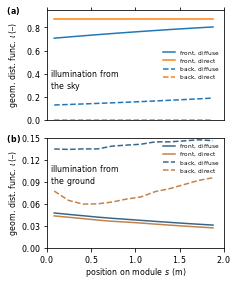

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(3.375, 4))
for i,sg in enumerate(['sky','ground']):
    if i == 0:
        ax = ax1
        subfig = r'\textbf{(a)}'
    else:
        ax = ax2
        subfig = r'\textbf{(b)}'
    for fb in ['front','back']:

        for k,dd in enumerate(['diffuse','direct']):
            k += 2*i
            if fb == 'front':
                linestyle = '-'
            else:
                linestyle= '--'

            ax.plot(GI.l_array,GI.results['irradiance_module_'+fb+'_'+sg+'_'+dd],linestyle,label=fb+', '+dd,color = colors[k]) #, mfc = insidecolor)
    ax.legend(frameon=False,fontsize=6)
    if i == 0:
        
        ax.set_ylim(0,.95)
        ax.text(-.45,0.97*.95,r'\textbf{(a)}')
        ax.text(.05,.4*.95,'illumination from')
        ax.text(.05,.28*.95,'the sky')
        ax.xaxis.tick_top()
        ax.set_xticklabels([])
    else:
        ax.set_ylim(0,0.15)
        ax.text(-.45,0.97*.15,r'\textbf{(b)}')
        ax.text(.05,.94*.112,'illumination from')
        ax.text(.05,.78*.112,'the ground')
        ax.set_xlabel('position on module $s$ (m)')
        ax.set_yticks(np.linspace(0,.15,6))
   
    ax.set_ylabel('geom.\ dist.\ func.\ $\iota$ (--)')
    
    ax.set_xlim(0,2)
fig.align_ylabels()
figname = 'figures/irradiance_module_v4.pdf'
plt.tight_layout()

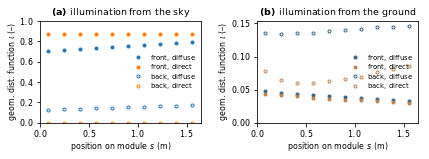

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6, 2.25))
for i,sg in enumerate(['sky','ground']):
    if i == 0:
        ax = ax1
        subfig = r'\textbf{(a)}'
    else:
        ax = ax2
        subfig = r'\textbf{(b)}'
    for fb in ['front','back']:

        for k,dd in enumerate(['diffuse','direct']):
            k += 2*i
            if fb == 'front':
                insidecolor = colors[k]
            else:
                insidecolor = '#ffffff'

            ax.plot(GI.l_array,GI.results['irradiance_module_'+fb+'_'+sg+'_'+dd],'.',label=fb+', '+dd,color = colors[k], mfc = insidecolor)
    ax.legend(frameon=False,fontsize=7)
    if i == 0:
        
        ax.set_ylim(0,1)
    else:
        ax.set_ylim(0,)
    ax.set_title(subfig+' illumination from the '+sg)
    ax.set_xlabel('position on module $s$ (m)')
    ax.set_ylabel('geom.\ dist.\ function $\iota$ (--)')
    ax.set_xlim(0,1.65)
figname = 'figures/irradiance_module.pdf'
plt.tight_layout()